## Equation Solving
### Importing modules:

In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

### Linear Equation Systems:

In general, a linear equation system can be written on the form:

\begin{gather*}
\Large a_{11}x_{1}  + a_{12}x_{2} + ... + a_{1n}x_{n} = b_{1}, \\
\Large a_{21}x_{1}  + a_{22}x_{2} + ... + a_{2n}x_{n} = b_{2}, \\
\newline
\Large a_{m1}x_{1}  + a_{m2}x_{2} + ... + a_{mn}x_{n} = b_{m}
\end{gather*}

### Square Systems:

\begin{gather*}
\Large \frac{ \| \delta x\| }{\|x\|}=\frac{\|A^{-1} \delta b \|}{\|x\|} \leq  \frac{\|A^{-1}\| . \| \delta b\|}{\|x\|}= \frac{\|A^{-1}\| . \|b\|}{\|x\|}. \frac{\|\delta b\|}{\|b\|}  \leq \|A^{-1}\| . \|A\| .  \frac{\|\delta b\|}{\|b\|}
\end{gather*}

#### Example:

\begin{gather*}
\Large 2x_{1} + 3x_{2} = 4 \\
\Large 5x_{1} + 4x_{2} = 3
\end{gather*}

In [2]:
# Using SymPy
A = sympy.Matrix([
    [2, 3],
    [5, 4]
])
b = sympy.Matrix([4, 3])

print(f"Rank of A: {A.rank()}")
print(f"Condition number of A: {A.condition_number()}")
print(f"Norm of A: {A.norm()}")

Rank of A: 2
Condition number of A: sqrt(2*sqrt(170) + 27)/sqrt(27 - 2*sqrt(170))
Norm of A: 3*sqrt(6)


In [3]:
# Using Numpy/SciPy
A = np.array([
    [2, 3],
    [5, 4]
])
b = np.array([4, 3])

print(f"Rank of A: {np.linalg.matrix_rank(A)}")
print(f"Condition number of A: {np.linalg.cond(A)}")
print(f"Norm of A: {np.linalg.norm(A)}")

Rank of A: 2
Condition number of A: 7.582401374401516
Norm of A: 7.3484692283495345


### LU factorization 
#### In SymPy:

In [4]:
A = sympy.Matrix([
    [2, 3],
    [5, 4]
])
b = sympy.Matrix([4, 3])

L, U, _ = A.LUdecomposition()
print(f"L: {L}")
print(f"U: {U}")
print(f"L * U: {L * U}")

x = A.solve(b)  # equivalent to A.LUsolve(b)
print(f"x: {x}")

L: Matrix([[1, 0], [5/2, 1]])
U: Matrix([[2, 3], [0, -7/2]])
L * U: Matrix([[2, 3], [5, 4]])
x: Matrix([[-1], [2]])


In [5]:
A = np.array([
    [2, 3],
    [5, 4]
])
b = np.array([4, 3])

P, L, U = la.lu(A)
print(f"L: \n{L}\n")
print(f"U: \n{U}\n")
print(f"P.dot(L.dot(U)): \n{P.dot(L.dot(U))}\n")
x = la.solve(A, b)
print(f"x: {x}")

L: 
[[1.  0. ]
 [0.4 1. ]]

U: 
[[5.  4. ]
 [0.  1.4]]

P.dot(L.dot(U)): 
[[2. 3.]
 [5. 4.]]

x: [-1.  2.]


### Rectangular Systems:

In [6]:
# defining true model
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x ** 2

In [7]:
# simulate noisy data
m = 100
X = 1 - 2 * np.random.randn(m)
Y = a + b * X  + c * x ** 2 + np.random.randn(m)

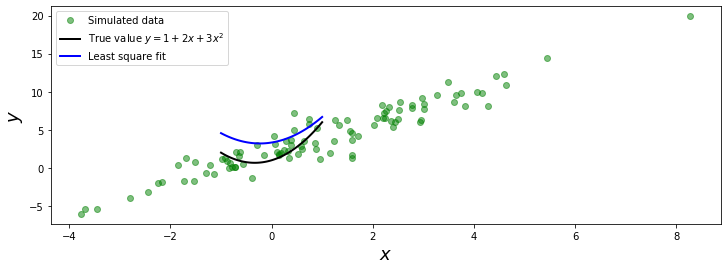

In [8]:
# fit the data to the model using linear least squares
A = np.vstack([X**0, x**1, x**2])
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

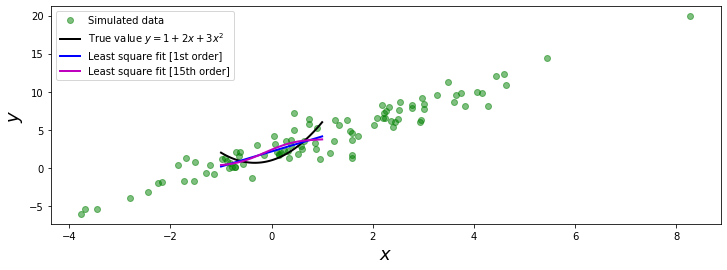

In [9]:
# fit the data to the model using linear least square:
# first order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r , rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

### EigenValue Problems:

In [10]:
# Example_01
A = np.array([
    [1, 3, 5],
    [3, 5, 3],
    [5, 3, 9]
])
e_vals, e_vecs = la.eig(A)
print(f"e_vals: {e_vals}\n")
print(f"e_vecs: \n{e_vecs}\n")
print(f"la.eigvalsh: {la.eigvalsh(A)}")

e_vals: [13.35310908+0.j -1.75902942+0.j  3.40592034+0.j]

e_vecs: 
[[ 0.42663918  0.90353276 -0.04009445]
 [ 0.43751227 -0.24498225 -0.8651975 ]
 [ 0.79155671 -0.35158534  0.49982569]]

la.eigvalsh: [-1.75902942  3.40592034 13.35310908]


### Non-Linear Equations:
$$a + bx + cx^{2} = 0$$

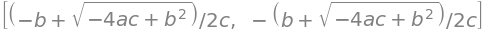

In [11]:
# Solving using sympy:

x, a, b, c = sympy.symbols("x, a, b, c")
sympy.solve(a + b*x + c*x**2, x)

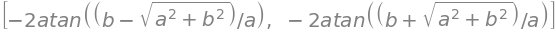

In [12]:
# trigonometric equations:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

In [13]:
# Example for not solvable equation:
try:
    sympy.solve(sympy.sin(x) - x, x)
except NotImplementedError:
    print("No algorithms are implemented to solve equation")

No algorithms are implemented to solve equation


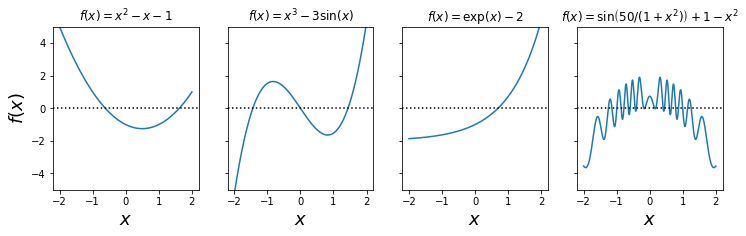

In [14]:
# Example_02

x = np.linspace(-2, 2, 1000)

# four examples of nonlinear functions
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

Text(0.5, 1.0, 'Bisection method')

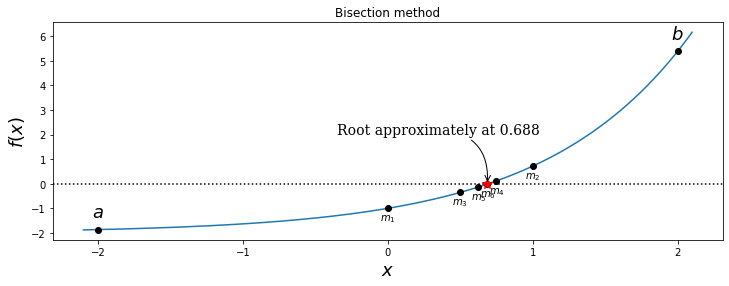

In [15]:
# Example_03
# The bisection method with a graphical visualization of each step:

# define a function, desired tolerance and starting interval [a, b]
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")

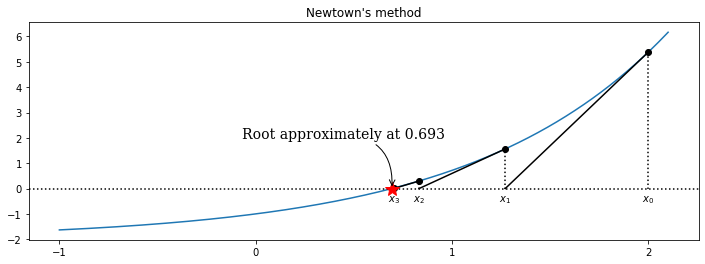

In [16]:
# Example_04
# Newton's method
# Using sympy:

# defining a function, desired tolernce and starting point xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# setting up a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, f(x))
ax.axhline(0, ls=":", color="k")

# iterating newton's method until convergence to the desired tolerance
# has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)
    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')
    
    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3, rad=-.5"))

ax.set_title("Newtown's method")
ax.set_xticks([-1, 0, 1, 2])    

In [17]:
# Example_05
# Using SciPy

optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

In [18]:
# Example_06
# finding the root of the equation expx - 2 = 0
# with and without specifying its derivative.

x_root_guess = 2
f = lambda x: np.exp(x) -2
fprime = lambda x:np.exp(x)
print(f"optimize.newton(f, x_root_guess): {optimize.newton(f, x_root_guess)}")
print(f"optimize.newton(f, x_root_guess, fprime=fprime): "
      f"{optimize.newton(f, x_root_guess, fprime=fprime)}")

optimize.newton(f, x_root_guess): 0.6931471805599455
optimize.newton(f, x_root_guess, fprime=fprime): 0.6931471805599453


In [19]:
# Example_07
# finding the root of the equation expx - 2 = 0
# using optimize.brentq(), optimize.brenth()

print(f"optimize.brentq(lambda x: np.exp(x) - 2, -2, 2): "
      f"{optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)}")

print(f"optimize.brenth(lambda x: np.exp(x) - 2, -2, 2): "
      f"{optimize.brenth(lambda x: np.exp(x) - 2, -2, 2)}")

optimize.brentq(lambda x: np.exp(x) - 2, -2, 2): 0.6931471805599453
optimize.brenth(lambda x: np.exp(x) - 2, -2, 2): 0.6931471805599381


### Systems of Non-Linear Equations:

$$\begin{cases}y - x^{3} - 2x^{2} + 1 = 0\\y + x^{2} - 1 = 0\end{cases} $$

which can be represented by the vector-valued function:

$$f([x_{1}, x_{2}]) = [x_{2} - x_{1}^{3} - 2x_{1}^{2} + 1, x_{2} - x_{1}^{2} - 1]$$

In [20]:
# Example_08

def f(x):
    return [x[1] - x[0]**3 - 2*x[0]**2 + 1, x[1] + x[0]**2 - 1]

optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [21]:
# Example_09

x, y = sympy.symbols("x, y")
f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat.jacobian(sympy.Matrix([x, y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [22]:
# Example_10

def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

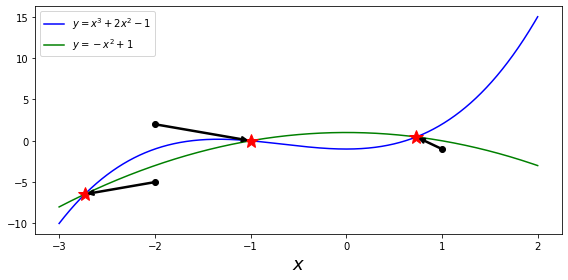

In [26]:
# Example_11

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)

    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=2.5))
    
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout()